In [12]:
import pandas as pd

dados_python = pd.read_csv('container_metrics_python_scraping.csv')
dados_golang = pd.read_csv('container_metrics_golang_scraping.csv')

dados_python.describe()
 



,cpu_usage,mem_usage,mem_limit,net_input,net_output,block_input,block_output
count,8094.000000,8094.000000,8094.0,8094.000000,8094.000000,8094.000000,8094.0
mean,1.164711,7.538020,128.0,0.267605,0.204365,0.245397,0.0
std,0.727556,0.995623,0.0,0.120890,0.127820,0.899010,0.0
min,0.000000,2.000000,128.0,0.003467,0.000341,0.000000,0.0
25%,0.680494,7.128906,128.0,0.169166,0.090538,0.000000,0.0
50%,1.110942,7.343750,128.0,0.270188,0.204182,0.000000,0.0
75%,1.387064,7.562500,128.0,0.371420,0.316886,0.000000,0.0
max,6.275140,15.585938,128.0,0.475388,0.426944,8.062500,0.0


In [13]:
dados_golang.describe()


,cpu_usage,mem_usage,mem_limit,net_input,net_output,block_input,block_output
count,8094.000000,8094.000000,8094.0,8094.000000,8094.000000,8094.000000,8094.0
mean,1.164711,7.538020,128.0,0.267605,0.204365,0.245397,0.0
std,0.727556,0.995623,0.0,0.120890,0.127820,0.899010,0.0
min,0.000000,2.000000,128.0,0.003467,0.000341,0.000000,0.0
25%,0.680494,7.128906,128.0,0.169166,0.090538,0.000000,0.0
50%,1.110942,7.343750,128.0,0.270188,0.204182,0.000000,0.0
75%,1.387064,7.562500,128.0,0.371420,0.316886,0.000000,0.0
max,6.275140,15.585938,128.0,0.475388,0.426944,8.062500,0.0


In [14]:
from datetime import datetime

dados_python['timestamp'] = pd.to_datetime(dados_python['timestamp'])
dados_golang['timestamp'] = pd.to_datetime(dados_golang['timestamp'])

duracao_python = (dados_python.groupby('container_id')['timestamp'].max() - dados_python.groupby('container_id')['timestamp'].min()).dt.total_seconds()
duracao_golang = (dados_golang.groupby('container_id')['timestamp'].max() - dados_golang.groupby('container_id')['timestamp'].min()).dt.total_seconds()

cpu_mem_python = dados_python.groupby('container_id')[['cpu_usage', 'mem_usage']].mean().reset_index()
cpu_mem_golang = dados_golang.groupby('container_id')[['cpu_usage', 'mem_usage']].mean().reset_index()

cpu_mem_python['duration'] = duracao_python.values
cpu_mem_golang['duration'] = duracao_golang.values

descritivas_python = cpu_mem_python[['cpu_usage', 'mem_usage', 'duration']].describe()

descritivas_golang = cpu_mem_golang[['cpu_usage', 'mem_usage', 'duration']].describe()

(descritivas_python, descritivas_golang)


(        cpu_usage   mem_usage    duration
 count  584.000000  584.000000  584.000000
 mean     4.187939   48.734066   26.837329
 std      1.812022    2.348426    9.251725
 min      0.059869   47.558408    2.000000
 25%      3.135606   48.123047   22.000000
 50%      3.640926   48.135612   26.000000
 75%      4.818200   48.151367   29.000000
 max     10.443610   79.071940   82.000000,
         cpu_usage   mem_usage    duration
 count  576.000000  576.000000  576.000000
 mean     1.185611    7.534288   26.194444
 std      0.442124    0.887476    8.799034
 min      0.000000    6.326389    0.000000
 25%      0.943043    7.237565   22.000000
 50%      1.104506    7.322105   24.000000
 75%      1.312768    7.421125   28.000000
 max      3.054590   15.245536   74.000000)

In [15]:
descritivas_python

,cpu_usage,mem_usage,duration
count,584.000000,584.000000,584.000000
mean,4.187939,48.734066,26.837329
std,1.812022,2.348426,9.251725
min,0.059869,47.558408,2.000000
25%,3.135606,48.123047,22.000000
50%,3.640926,48.135612,26.000000
75%,4.818200,48.151367,29.000000
max,10.443610,79.071940,82.000000


In [16]:
descritivas_golang

,cpu_usage,mem_usage,duration
count,576.000000,576.000000,576.000000
mean,1.185611,7.534288,26.194444
std,0.442124,0.887476,8.799034
min,0.000000,6.326389,0.000000
25%,0.943043,7.237565,22.000000
50%,1.104506,7.322105,24.000000
75%,1.312768,7.421125,28.000000
max,3.054590,15.245536,74.000000


In [17]:
from scipy.stats import mannwhitneyu

# Realizando o teste de Mann-Whitney para CPU Usage, Mem Usage e Duration
mwu_cpu = mannwhitneyu(cpu_mem_python['cpu_usage'], cpu_mem_golang['cpu_usage'], alternative='two-sided')
mwu_mem = mannwhitneyu(cpu_mem_python['mem_usage'], cpu_mem_golang['mem_usage'], alternative='two-sided')
mwu_duration = mannwhitneyu(cpu_mem_python['duration'], cpu_mem_golang['duration'], alternative='two-sided')

(mwu_cpu.pvalue, mwu_mem.pvalue, mwu_duration.pvalue)


(1.0324799877951886e-165, 4.857740224762978e-191, 0.09740530856443635)

In [7]:
import pandas as pd
import scipy.stats as stats

python_data = pd.read_csv('container_metrics_python_scraping.csv')
golang_data = pd.read_csv('container_metrics_golang_scraping.csv')

memoria_python = python_data['mem_usage']
memoria_golang = golang_data['mem_usage']

u_stat, p_valor = stats.mannwhitneyu(memoria_python, memoria_golang)

print(f"Estatística de teste: {u_stat}, P-valor: {p_valor}")


Estatística de teste: 67932942.0, P-valor: 0.0


In [8]:
python_data['timestamp'] = pd.to_datetime(python_data['timestamp'])
golang_data['timestamp'] = pd.to_datetime(golang_data['timestamp'])

python_duration = python_data.groupby('container_id')['timestamp'].apply(lambda x: x.max() - x.min()).dt.total_seconds()
golang_duration = golang_data.groupby('container_id')['timestamp'].apply(lambda x: x.max() - x.min()).dt.total_seconds()

u_stat, p_valor = stats.mannwhitneyu(python_duration, golang_duration)

print(f'Estatística de teste: {u_stat}, P-valor: {p_valor}')

Estatística de teste: 177592.0, P-valor: 0.09740530856443635


In [10]:
memoria_python = python_data['cpu_usage']
memoria_golang = golang_data['cpu_usage']

u_stat, p_valor = stats.mannwhitneyu(memoria_python, memoria_golang)

print(f"Estatística de teste: {u_stat}, P-valor: {p_valor}")


Estatística de teste: 60114507.0, P-valor: 0.0


In [3]:
import pandas as pd

python_data = pd.read_csv('./container_metrics_python_scraping.csv')
golang_data = pd.read_csv('./container_metrics_golang_scraping.csv')


precos_memoria_por_segundo = {
    0.125: 0.00000231,  # 128 MB
    0.25: 0.00000463,   # 256 MB
    0.5: 0.00000925,    # 512 MB
    1: 0.0000165,       # 1024 MB
    2: 0.000029,        # 2048 MB
    4: 0.000058,        # 4096 MB
    8: 0.000068,        # 8192 MB
    16: 0.000136,       # 16384 MB
    32: 0.000272        # 32768 MB
}

preco_por_invocacao = 0.40 / 1_000_000

def calcular_custo(df, precos_memoria):
    df['mem_gb'] = df['mem_usage'] / 1024
    total_gb_segundos = df['mem_gb'].sum()
    
    total_ghz_segundos = total_gb_segundos  # Simplificação, assumindo proporção 1:1
    
    gb_precos = min(precos_memoria.keys(), key=lambda x: abs(x - df['mem_gb'].mean()))
    custo_memoria = total_gb_segundos * precos_memoria[gb_precos]
    
    custo_cpu = total_ghz_segundos * precos_memoria[gb_precos]
    
    return custo_memoria, custo_cpu, total_gb_segundos, total_ghz_segundos

custo_memoria_python, custo_cpu_python, gb_seg_python, ghz_seg_python = calcular_custo(python_data, precos_memoria_por_segundo)
custo_memoria_golang, custo_cpu_golang, gb_seg_golang, ghz_seg_golang = calcular_custo(golang_data, precos_memoria_por_segundo)

invocacoes_python = python_data['container_id'].nunique()
invocacoes_golang = golang_data['container_id'].nunique()

custo_invocacoes_python = max(invocacoes_python - 2_000_000, 0) * preco_por_invocacao
custo_invocacoes_golang = max(invocacoes_golang - 2_000_000, 0) * preco_por_invocacao

custo_total_python = custo_memoria_python + custo_cpu_python + custo_invocacoes_python
custo_total_golang = custo_memoria_golang + custo_cpu_golang + custo_invocacoes_golang

custos={
    "custo_total_python": custo_total_python,
    "custo_total_go": custo_total_golang,
    "Custo Memória Python": custo_memoria_python,
    "Custo CPU Python": custo_cpu_python,
    "Custo Memória Go": custo_memoria_golang,
    "Custo CPU Go": custo_cpu_golang,
    "GB-segundos Python": gb_seg_python,
    "GHz-segundos Python": ghz_seg_python,
    "GB-segundos Go": gb_seg_golang,
    "GHz-segundos Go": ghz_seg_golang,
    "Invocações Python": invocacoes_python,
    "Invocações Go": invocacoes_golang
}


In [4]:
custos['custo_total_python']/custos['custo_total_go']

6.696332905421442

In [5]:
custos

{'custo_total_python': 0.0018433148268127441,
 'custo_total_go': 0.00027527228004455565,
 'Custo Memória Python': 0.0009216574134063721,
 'Custo CPU Python': 0.0009216574134063721,
 'Custo Memória Go': 0.00013763614002227782,
 'Custo CPU Go': 0.00013763614002227782,
 'GB-segundos Python': 398.9858932495117,
 'GHz-segundos Python': 398.9858932495117,
 'GB-segundos Go': 59.58274459838867,
 'GHz-segundos Go': 59.58274459838867,
 'Invocações Python': 584,
 'Invocações Go': 576}

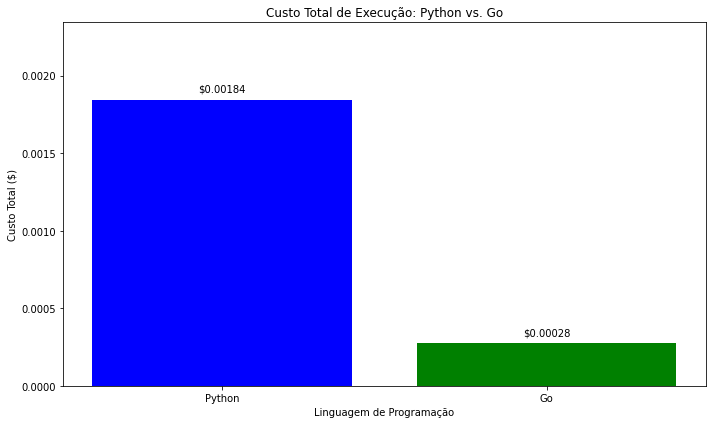

In [8]:
import matplotlib.pyplot as plt

custos = {
    "Python":custos['custo_total_python'],
    "Go": custos['custo_total_go']
}

linguagens = list(custos.keys())
valores_custo = list(custos.values())

plt.figure(figsize=(10, 6))
plt.bar(linguagens, valores_custo, color=['blue', 'green'])

plt.title('Custo Total de Execução: Python vs. Go')
plt.xlabel('Linguagem de Programação')
plt.ylabel('Custo Total ($)')

for i, valor in enumerate(valores_custo):
    plt.text(i, valor + 0.00005, f"${valor:.5f}", ha = 'center')

plt.ylim(0, max(valores_custo) + 0.0005) 
plt.tight_layout()
plt.show()
